## **Creating New Columns using existing columns**

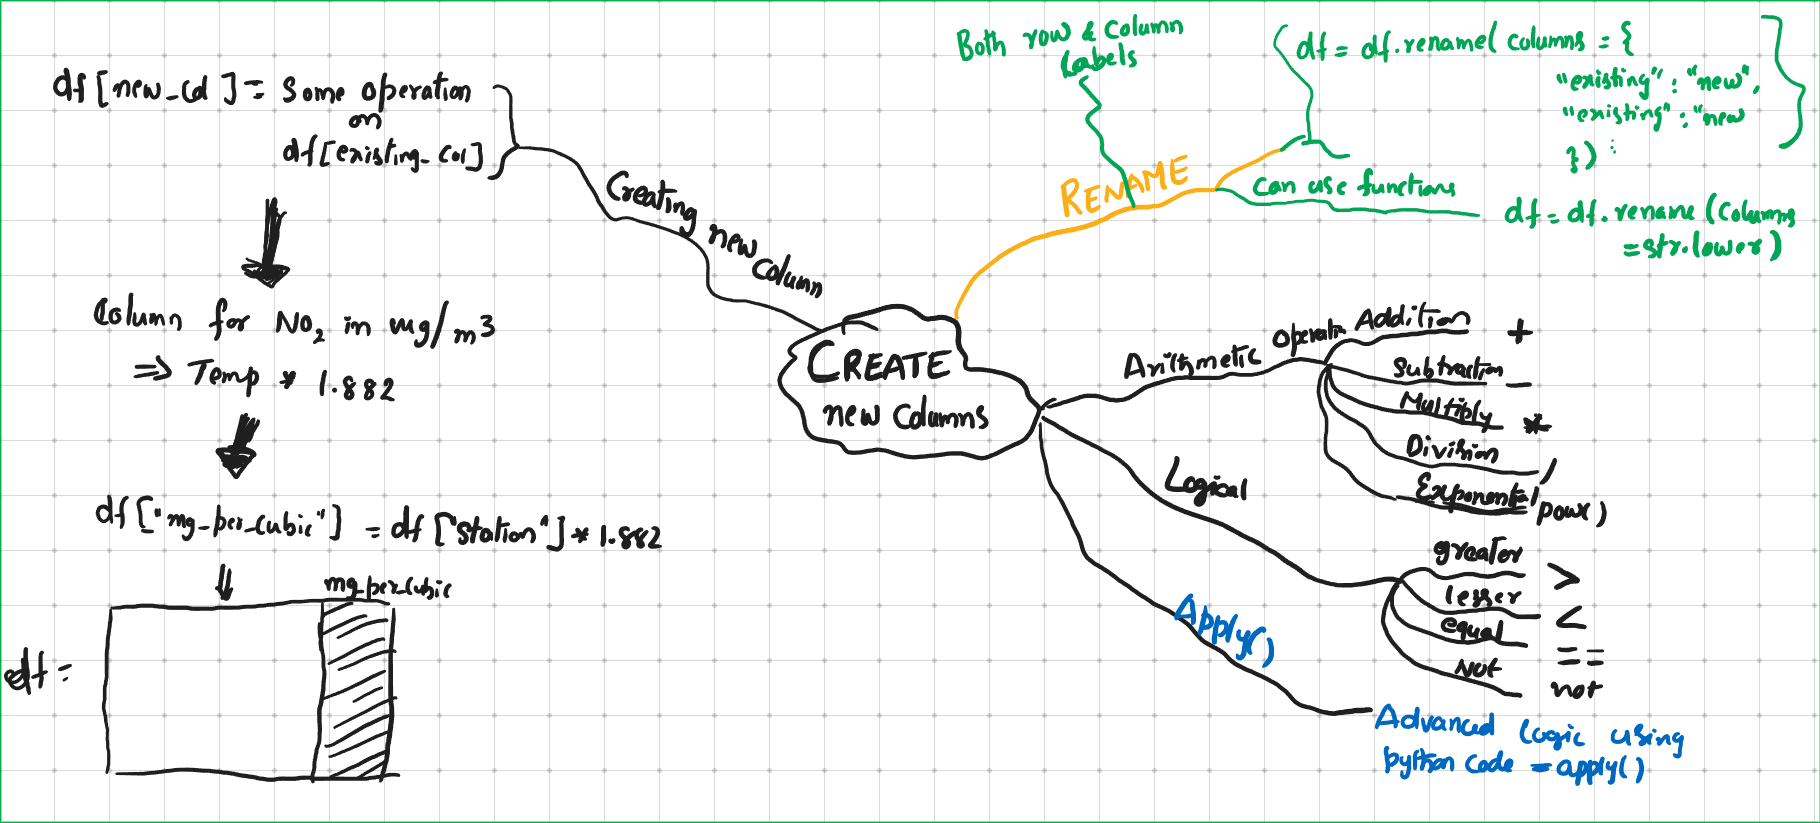

In [1]:
import pandas as pd

In [2]:
air_quality = pd.read_csv("Data/air_quality_no2.csv", index_col = 0, parse_dates = True)
air_quality

,station_antwerp,station_paris,station_london
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN
...,...,...,...
2019-06-20 22:00:00,NaN,21.4,NaN
2019-06-20 23:00:00,NaN,24.9,NaN
2019-06-21 00:00:00,NaN,26.5,NaN


In [3]:
air_quality['london_mg_per_cubic'] = air_quality['station_london'] * 1.882
air_quality.head()

,station_antwerp,station_paris,station_london,london_mg_per_cubic
datetime,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286
2019-05-07 03:00:00,50.5,25.0,19.0,35.758
2019-05-07 04:00:00,45.0,27.7,19.0,35.758
2019-05-07 05:00:00,NaN,50.4,16.0,30.112
2019-05-07 06:00:00,NaN,61.9,NaN,NaN


In [4]:
air_quality['ratio_paris_antwerp'] = air_quality['station_paris'] / air_quality['station_antwerp']
air_quality.head()

,station_antwerp,station_paris,station_london,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


In [5]:
air_quality = air_quality.rename(columns = {
    "station_antwerp": "BETR801",
    "station_paris": "FR04014",
    "station_london": "London Westminster"
})

In [6]:
air_quality.head()

,BETR801,FR04014,London Westminster,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


In [7]:
air_quality = air_quality.rename(columns = str.lower)
air_quality.head()

,betr801,fr04014,london westminster,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


## **Calculate Summary Statistics**
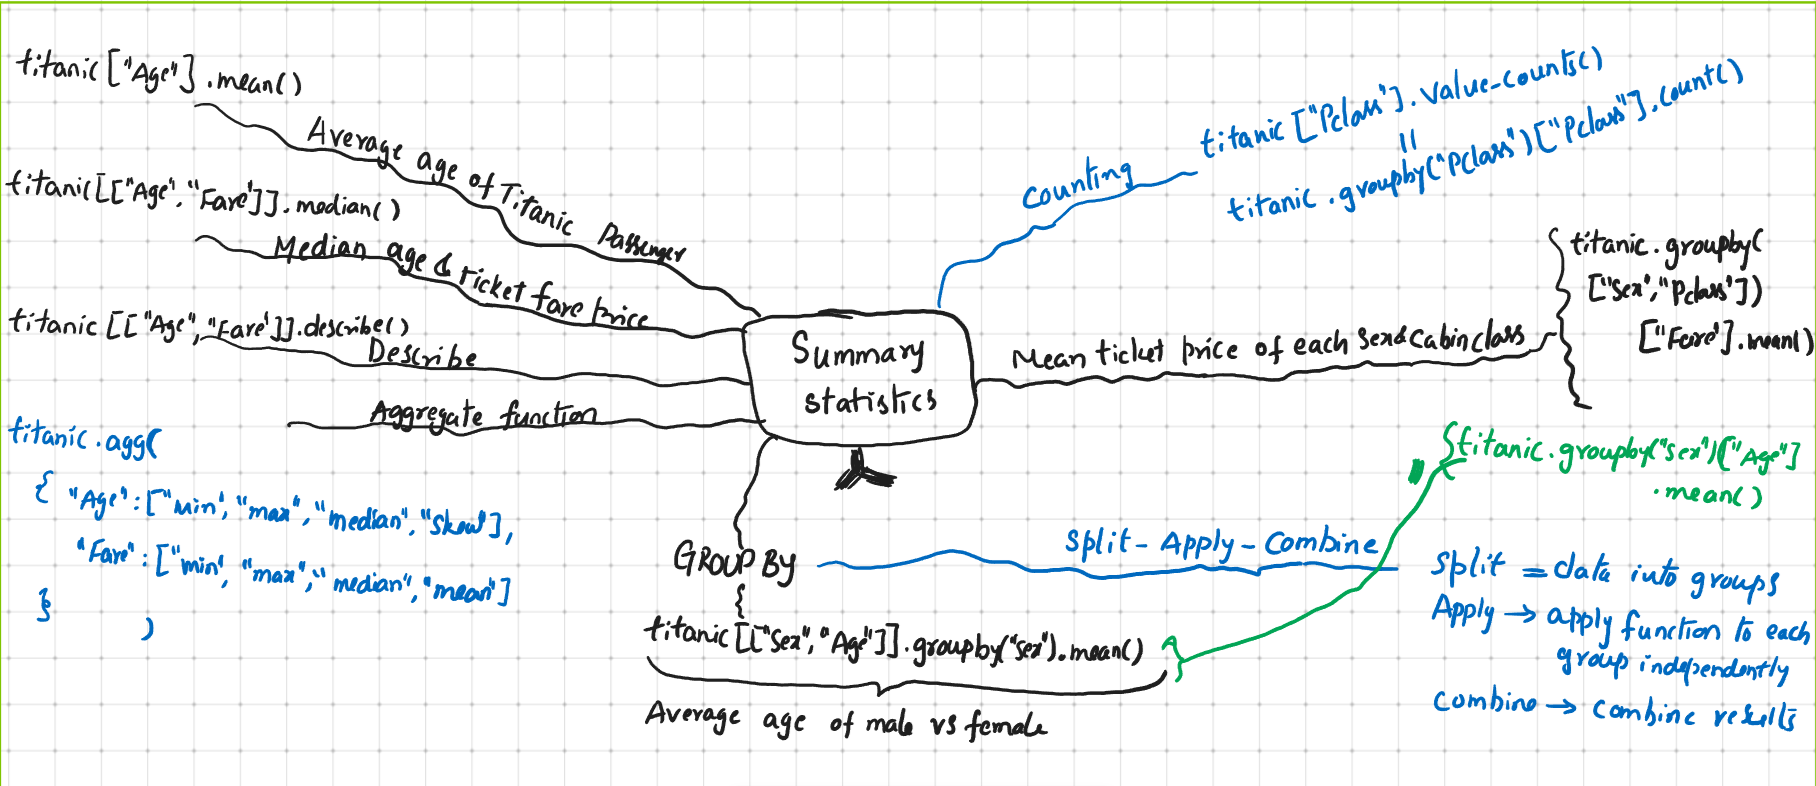


In [8]:
titanic = pd.read_csv("Data/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic['Age'].mean()

29.69911764705882

In [10]:
titanic[['Age','Fare']].median()

Age     28.0000
Fare    14.4542
dtype: float64

In [11]:
titanic[['Age','Fare']].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


#### **Aggregate Function**

In [12]:
titanic.agg(
    {
        "Age": ["min","max","mean","skew"],
        "Fare": ["min","max","mean","median"]
    }
)


,Age,Fare
min,0.420000,0.000000
max,80.000000,512.329200
mean,29.699118,32.204208
skew,0.389108,NaN
median,NaN,14.454200


#### **Groupby**

In [13]:
titanic[['Sex','Age']].groupby('Sex').mean()

,Age
Sex,
female,27.915709
male,30.726645


In [14]:
titanic.groupby('Sex').mean(numeric_only = True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [15]:
titanic.groupby('Sex')['Age'].mean(numeric_only = True)

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [16]:
titanic.groupby(['Sex','Pclass'])['Fare'].mean() # Group by Multiple Columns

Sex     Pclass
female  1         106.125798
        2          21.970121
        3          16.118810
male    1          67.226127
        2          19.741782
        3          12.661633
Name: Fare, dtype: float64

#### **Counting**

In [17]:
titanic['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [18]:
titanic.groupby('Pclass')['Pclass'].count()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

## **Reshaping using Pandas**

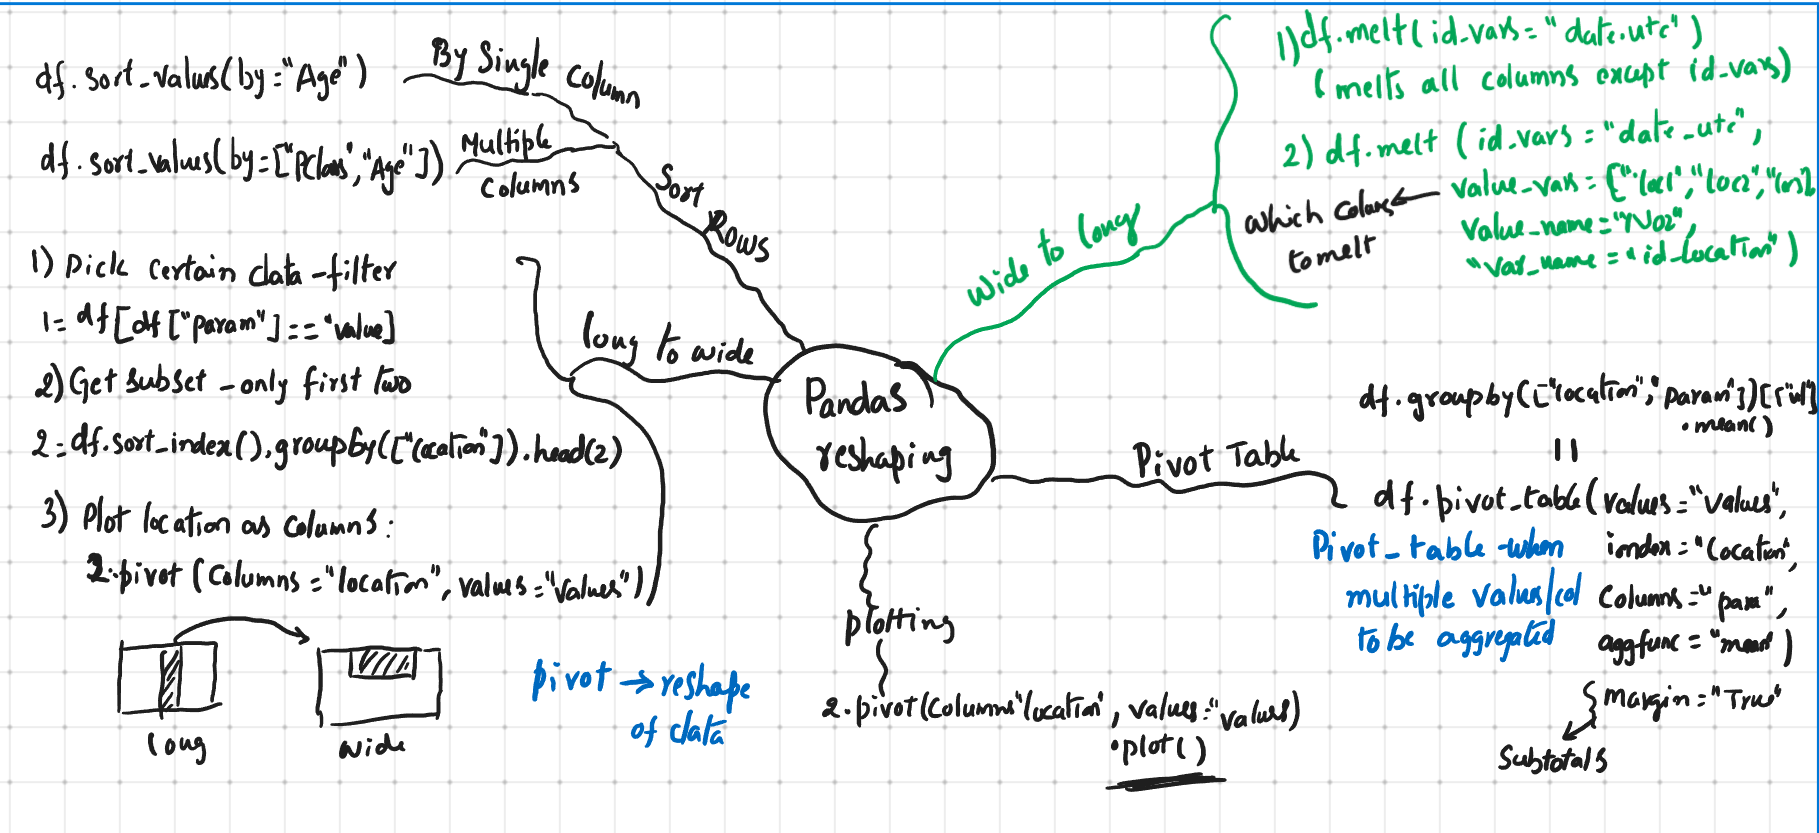

In [19]:
titanic = pd.read_csv("Data/titanic.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [20]:
air_quality = pd.read_csv("Data/air_quality_long.csv",index_col = "date.utc", parse_dates = True)
air_quality

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-18 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.0,µg/m³
2019-06-17 08:00:00+00:00,Antwerpen,BE,BETR801,pm25,6.5,µg/m³
2019-06-17 07:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.5,µg/m³
2019-06-17 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,16.0,µg/m³
2019-06-17 05:00:00+00:00,Antwerpen,BE,BETR801,pm25,7.5,µg/m³
...,...,...,...,...,...,...
2019-04-09 06:00:00+00:00,London,GB,London Westminster,no2,41.0,µg/m³
2019-04-09 05:00:00+00:00,London,GB,London Westminster,no2,41.0,µg/m³
2019-04-09 04:00:00+00:00,London,GB,London Westminster,no2,41.0,µg/m³


In [21]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [22]:
air_quality.columns

Index(['city', 'country', 'location', 'parameter', 'value', 'unit'], dtype='object')

### **Sorting By values**

In [23]:
# Sorting using single column
titanic.sort_values(by = 'Age').head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S


In [24]:
# Sorting using multiple columns
titanic.sort_values(by = ['Pclass','Age']).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
445,446,1,1,"Dodge, Master. Washington",male,4.00,0,2,33638,81.8583,A34,S
802,803,1,1,"Carter, Master. William Thornton II",male,11.00,1,2,113760,120.0000,B96 B98,S
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.00,1,2,113760,120.0000,B96 B98,S


### **Long to Wide table format**

In [25]:
no2 = air_quality[air_quality['parameter'] == "no2"]
no2

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-21 00:00:00+00:00,Paris,FR,FR04014,no2,20.0,µg/m³
2019-06-20 23:00:00+00:00,Paris,FR,FR04014,no2,21.8,µg/m³
2019-06-20 22:00:00+00:00,Paris,FR,FR04014,no2,26.5,µg/m³
2019-06-20 21:00:00+00:00,Paris,FR,FR04014,no2,24.9,µg/m³
2019-06-20 20:00:00+00:00,Paris,FR,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...
2019-04-09 06:00:00+00:00,London,GB,London Westminster,no2,41.0,µg/m³
2019-04-09 05:00:00+00:00,London,GB,London Westminster,no2,41.0,µg/m³
2019-04-09 04:00:00+00:00,London,GB,London Westminster,no2,41.0,µg/m³


In [26]:
# Getting the first two values from no2
no2_subset = no2.sort_index().groupby(['location']).head(2)
no2_subset

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-04-09 01:00:00+00:00,Antwerpen,BE,BETR801,no2,22.5,µg/m³
2019-04-09 01:00:00+00:00,Paris,FR,FR04014,no2,24.4,µg/m³
2019-04-09 02:00:00+00:00,London,GB,London Westminster,no2,67.0,µg/m³
2019-04-09 02:00:00+00:00,Antwerpen,BE,BETR801,no2,53.5,µg/m³
2019-04-09 02:00:00+00:00,Paris,FR,FR04014,no2,27.4,µg/m³
2019-04-09 03:00:00+00:00,London,GB,London Westminster,no2,67.0,µg/m³


In [27]:
# Getting location values in seperate columns
no2_subset.pivot(columns = "location", values = "value")

location,BETR801,FR04014,London Westminster
date.utc,,,
2019-04-09 01:00:00+00:00,22.5,24.4,NaN
2019-04-09 02:00:00+00:00,53.5,27.4,67.0
2019-04-09 03:00:00+00:00,NaN,NaN,67.0


#### Plotting

In [28]:
no2.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-21 00:00:00+00:00,Paris,FR,FR04014,no2,20.0,µg/m³
2019-06-20 23:00:00+00:00,Paris,FR,FR04014,no2,21.8,µg/m³
2019-06-20 22:00:00+00:00,Paris,FR,FR04014,no2,26.5,µg/m³
2019-06-20 21:00:00+00:00,Paris,FR,FR04014,no2,24.9,µg/m³
2019-06-20 20:00:00+00:00,Paris,FR,FR04014,no2,21.4,µg/m³


<Axes: xlabel='date.utc'>

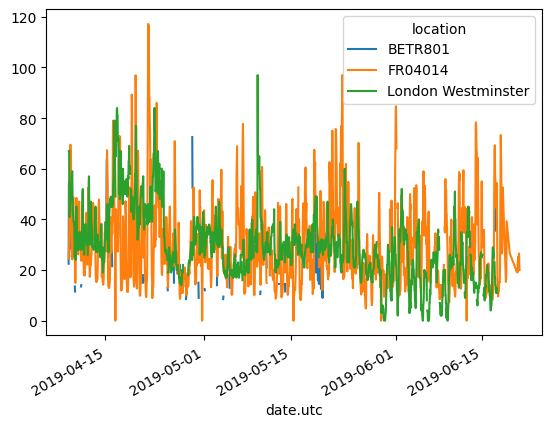

In [29]:
no2.pivot(columns = "location", values = "value").plot()

### **pivot table**

In [30]:
air_quality.pivot_table(
    values = "value",
    columns = "parameter",
    index = "location",
    aggfunc = "mean"
)

parameter,no2,pm25
location,,
BETR801,26.950920,23.169492
FR04014,29.374284,NaN
London Westminster,29.740050,13.443568


In [31]:
air_quality.pivot_table(
    values = "value",
    columns = "parameter",
    index = "location",
    aggfunc = "median"
)

parameter,no2,pm25
location,,
BETR801,25.0,18.5
FR04014,26.1,NaN
London Westminster,28.0,9.0


In [32]:
air_quality.pivot_table(
    values = "value",
    columns = "parameter",
    index = "location",
    aggfunc = "mean",
    margins = True
)

parameter,no2,pm25,All
location,,,
BETR801,26.950920,23.169492,24.982353
FR04014,29.374284,NaN,29.374284
London Westminster,29.740050,13.443568,21.491708
All,29.430316,14.386849,24.222743


In [33]:
air_quality.groupby(['parameter','location'])['value'].mean()

parameter  location          
no2        BETR801               26.950920
           FR04014               29.374284
           London Westminster    29.740050
pm25       BETR801               23.169492
           London Westminster    13.443568
Name: value, dtype: float64

### **Wide to Long format**

In [34]:
no2.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-21 00:00:00+00:00,Paris,FR,FR04014,no2,20.0,µg/m³
2019-06-20 23:00:00+00:00,Paris,FR,FR04014,no2,21.8,µg/m³
2019-06-20 22:00:00+00:00,Paris,FR,FR04014,no2,26.5,µg/m³
2019-06-20 21:00:00+00:00,Paris,FR,FR04014,no2,24.9,µg/m³
2019-06-20 20:00:00+00:00,Paris,FR,FR04014,no2,21.4,µg/m³


In [35]:
no2_pivoted = no2.pivot(
    columns = "location",
    values = "value"
).reset_index()
no2_pivoted.head()

location,date.utc,BETR801,FR04014,London Westminster
0,2019-04-09 01:00:00+00:00,22.5,24.4,NaN
1,2019-04-09 02:00:00+00:00,53.5,27.4,67.0
2,2019-04-09 03:00:00+00:00,54.5,34.2,67.0
3,2019-04-09 04:00:00+00:00,34.5,48.5,41.0
4,2019-04-09 05:00:00+00:00,46.5,59.5,41.0


In [36]:
no2_long = no2_pivoted.melt(
    id_vars = "date.utc"
)
no2_long.head()

,date.utc,location,value
0,2019-04-09 01:00:00+00:00,BETR801,22.5
1,2019-04-09 02:00:00+00:00,BETR801,53.5
2,2019-04-09 03:00:00+00:00,BETR801,54.5
3,2019-04-09 04:00:00+00:00,BETR801,34.5
4,2019-04-09 05:00:00+00:00,BETR801,46.5


In [37]:
no2_long = no2_pivoted.melt(
    id_vars = "date.utc",
    value_name = "no2",
    value_vars = ['BETR801','FR04014','London Westminster'],
    var_name = "id_location"
)
no2_long.head()

,date.utc,id_location,no2
0,2019-04-09 01:00:00+00:00,BETR801,22.5
1,2019-04-09 02:00:00+00:00,BETR801,53.5
2,2019-04-09 03:00:00+00:00,BETR801,54.5
3,2019-04-09 04:00:00+00:00,BETR801,34.5
4,2019-04-09 05:00:00+00:00,BETR801,46.5


In [38]:
no2_long.count()

date.utc       5115
id_location    5115
no2            3447
dtype: int64

## **Combine Data from multiple Tables**

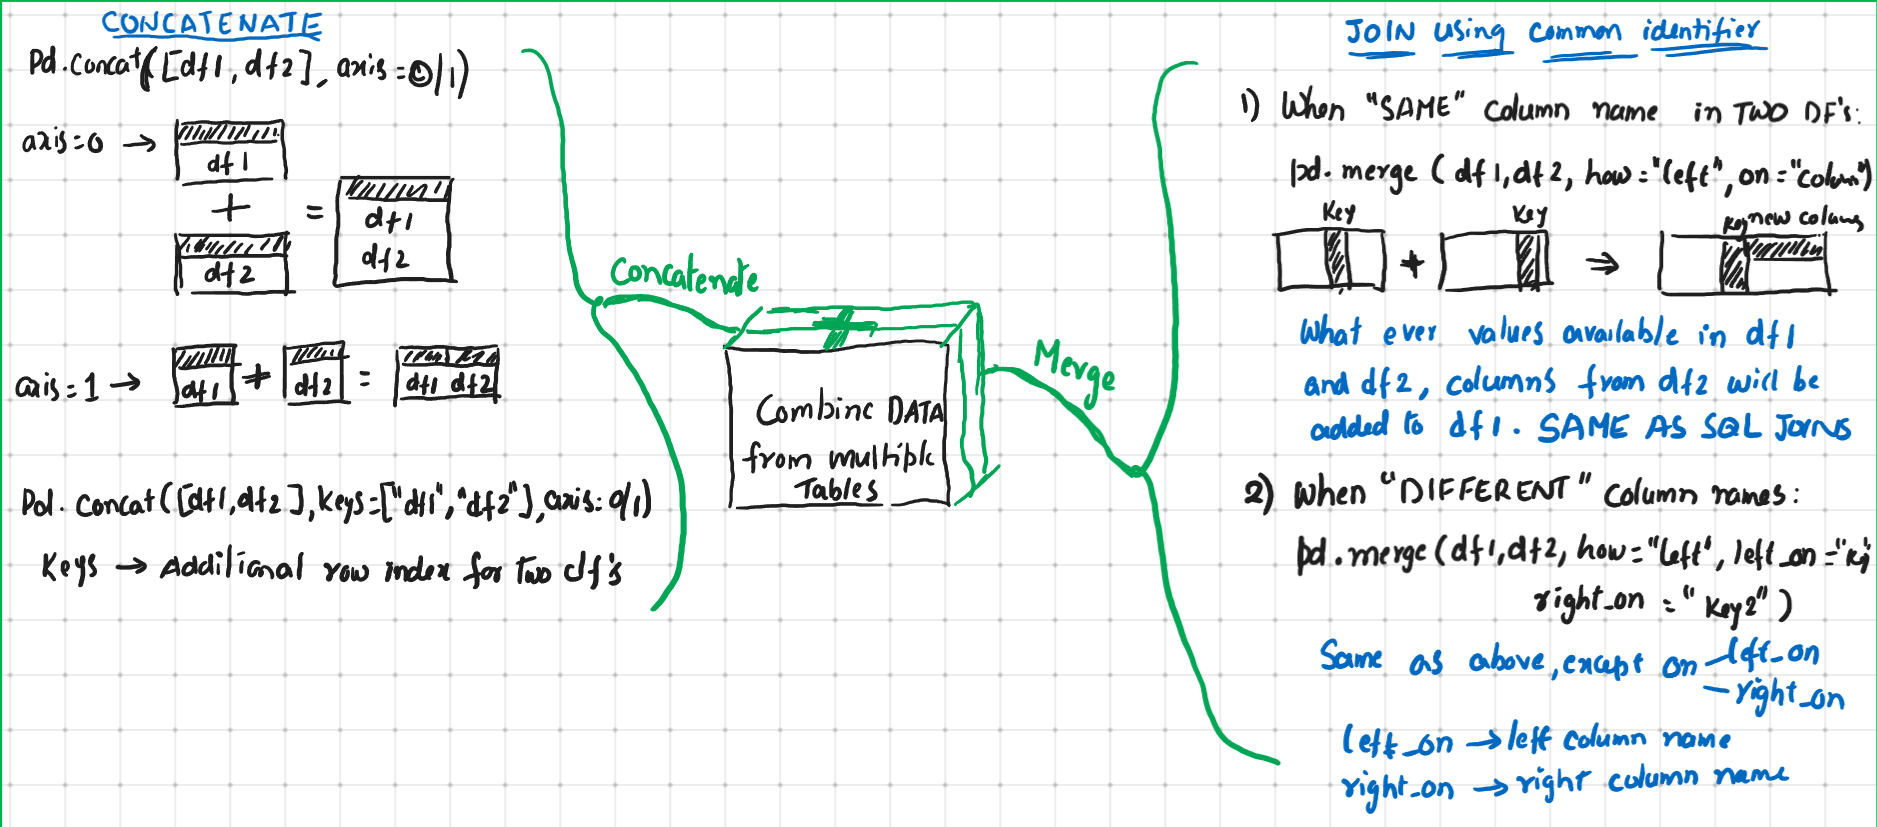

In [43]:
air_quality_no2 = pd.read_csv("Data/air_quality_no2_long.csv", parse_dates = True)
air_quality_pm25 = pd.read_csv("Data/air_quality_pm25_long.csv", parse_dates = True)

In [44]:
air_quality_no2.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [45]:
air_quality_pm25.head()

,city,country,date.utc,location,parameter,value,unit
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³


In [48]:
air_quality_no2.shape, air_quality_pm25.shape

((2068, 7), (1110, 7))

In [47]:
air_quality = pd.concat([air_quality_no2, air_quality_pm25], axis = 0)
air_quality

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...,...
1105,London,GB,2019-05-07 06:00:00+00:00,London Westminster,pm25,9.0,µg/m³
1106,London,GB,2019-05-07 04:00:00+00:00,London Westminster,pm25,8.0,µg/m³
1107,London,GB,2019-05-07 03:00:00+00:00,London Westminster,pm25,8.0,µg/m³
1108,London,GB,2019-05-07 02:00:00+00:00,London Westminster,pm25,8.0,µg/m³


In [49]:
air_quality.shape

(3178, 7)

In [50]:
air_quality_keys = pd.concat([air_quality_no2, air_quality_pm25], keys=['NO2','PM25'], axis = 0)
air_quality_keys

city country                   date.utc            location  \
NO2  0      Paris      FR  2019-06-21 00:00:00+00:00             FR04014   
     1      Paris      FR  2019-06-20 23:00:00+00:00             FR04014   
     2      Paris      FR  2019-06-20 22:00:00+00:00             FR04014   
     3      Paris      FR  2019-06-20 21:00:00+00:00             FR04014   
     4      Paris      FR  2019-06-20 20:00:00+00:00             FR04014   
...           ...     ...                        ...                 ...   
PM25 1105  London      GB  2019-05-07 06:00:00+00:00  London Westminster   
     1106  London      GB  2019-05-07 04:00:00+00:00  London Westminster   
     1107  London      GB  2019-05-07 03:00:00+00:00  London Westminster   
     1108  London      GB  2019-05-07 02:00:00+00:00  London Westminster   
     1109  London      GB  2019-05-07 01:00:00+00:00  London Westminster   

          parameter  value   unit  
NO2  0          no2   20.0  µg/m³  
     1          no2   21.8  µg/m³  
     2          no2   26.5  µg/m³  
     3          no2   24.9  µg/m³  
     4          no2   21.4  µg/m³  
...             ...    ...    ...  
PM25 1105      pm25    9.0  µg/m³  
     1106      pm25    8.0  µg/m³  
     1107      pm25    8.0  µg/m³  
     1108      pm25    8.0  µg/m³  
     1109      pm25    8.0  µg/m³  

[3178 rows x 7 columns]

In [51]:
air_quality_keys.sort_values(by = 'date.utc')

city country                   date.utc            location  \
PM25 1109     London      GB  2019-05-07 01:00:00+00:00  London Westminster   
NO2  2067     London      GB  2019-05-07 01:00:00+00:00  London Westminster   
     1098  Antwerpen      BE  2019-05-07 01:00:00+00:00             BETR801   
     1003      Paris      FR  2019-05-07 01:00:00+00:00             FR04014   
PM25 100   Antwerpen      BE  2019-05-07 01:00:00+00:00             BETR801   
...              ...     ...                        ...                 ...   
NO2  2         Paris      FR  2019-06-20 22:00:00+00:00             FR04014   
PM25 102      London      GB  2019-06-20 23:00:00+00:00  London Westminster   
NO2  1         Paris      FR  2019-06-20 23:00:00+00:00             FR04014   
PM25 101      London      GB  2019-06-21 00:00:00+00:00  London Westminster   
NO2  0         Paris      FR  2019-06-21 00:00:00+00:00             FR04014   

          parameter  value   unit  
PM25 1109      pm25    8.0  µg/m³  
NO2  2067       no2   23.0  µg/m³  
     1098       no2   50.5  µg/m³  
     1003       no2   25.0  µg/m³  
PM25 100       pm25   12.5  µg/m³  
...             ...    ...    ...  
NO2  2          no2   26.5  µg/m³  
PM25 102       pm25    7.0  µg/m³  
NO2  1          no2   21.8  µg/m³  
PM25 101       pm25    7.0  µg/m³  
NO2  0          no2   20.0  µg/m³  

[3178 rows x 7 columns]

### **Join Tables using common identifier**

In [52]:
air_quality_stations = pd.read_csv("Data/air_quality_stations.csv")
air_quality_parameters = pd.read_csv("Data/air_quality_parameters.csv")

In [53]:
air_quality_stations.shape, air_quality_parameters.shape

((66, 3), (7, 3))

In [54]:
air_quality_stations

,location,coordinates.latitude,coordinates.longitude
0,BELAL01,51.23619,4.38522
1,BELHB23,51.17030,4.34100
2,BELLD01,51.10998,5.00486
3,BELLD02,51.12038,5.02155
4,BELR833,51.32766,4.36226
...,...,...,...
61,Southend-on-Sea,51.54420,0.67841
62,Southwark A2 Old Kent Road,51.48050,-0.05955
63,Thurrock,51.47707,0.31797
64,Tower Hamlets Roadside,51.52253,-0.04216


In [55]:
air_quality_parameters

,id,description,name
0,bc,Black Carbon,BC
1,co,Carbon Monoxide,CO
2,no2,Nitrogen Dioxide,NO2
3,o3,Ozone,O3
4,pm10,Particulate matter less than 10 micrometers in...,PM10
5,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
6,so2,Sulfur Dioxide,SO2


#### **When there is a common column in two data frames**

In [56]:
air_quality_keys = pd.merge(air_quality_keys, air_quality_stations, how = "left", on ="location")
air_quality_keys

,city,country,date.utc,location,parameter,value,unit,coordinates.latitude,coordinates.longitude
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,48.83724,2.39390
1,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,48.83722,2.39390
2,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,48.83724,2.39390
3,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,48.83722,2.39390
4,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,48.83724,2.39390
...,...,...,...,...,...,...,...,...,...
4177,London,GB,2019-05-07 06:00:00+00:00,London Westminster,pm25,9.0,µg/m³,51.49467,-0.13193
4178,London,GB,2019-05-07 04:00:00+00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193
4179,London,GB,2019-05-07 03:00:00+00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193
4180,London,GB,2019-05-07 02:00:00+00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193


#### **When there are not common columns in dataframes**

In [57]:
air_quality_keys = pd.merge(air_quality_keys, air_quality_parameters, how = "left", left_on = "parameter", right_on = "id")
air_quality_keys

,city,country,date.utc,location,parameter,value,unit,coordinates.latitude,coordinates.longitude,id,description,name
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,48.83724,2.39390,no2,Nitrogen Dioxide,NO2
1,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,48.83722,2.39390,no2,Nitrogen Dioxide,NO2
2,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,48.83724,2.39390,no2,Nitrogen Dioxide,NO2
3,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,48.83722,2.39390,no2,Nitrogen Dioxide,NO2
4,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,48.83724,2.39390,no2,Nitrogen Dioxide,NO2
...,...,...,...,...,...,...,...,...,...,...,...,...
4177,London,GB,2019-05-07 06:00:00+00:00,London Westminster,pm25,9.0,µg/m³,51.49467,-0.13193,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
4178,London,GB,2019-05-07 04:00:00+00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
4179,London,GB,2019-05-07 03:00:00+00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
4180,London,GB,2019-05-07 02:00:00+00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5


In [58]:
air_quality_keys.shape

(4182, 12)